In [43]:
import pandas as pd

In [56]:
data = pd.read_csv('/content/drive/MyDrive/Skripsi/data_uji.csv')
data = data.drop(columns=['labels'])
data.head(5)

,tweets
0,"Well, I wrote a blog post about ChatGPT, why I'm personally not worried about it for my teaching, and some interesting ways we could use it in research! #ClassicsTwitter #AncMedTwitter\n\nhttps://..."
1,"Hear me out, ChatGPT but it goes to your support ticketing system and answers customers’ questions. https://t.co/q8J3jAC1zo"
2,Playing with this for 2 days with different parts of my work. And this is already 80% on the way to a decent AGU proposal. #ChatGPT https://t.co/wrQ27W1KVk
3,"It is SO funny that when OpenAI's ChatGPT chatbot doesn't know how to or refuses to do something, you can ask it to just pretend that it can, and it will. I wonder if Asimov ever wrote a story abo..."
4,"""Until recently, interaction labor… has experienced the least mature technological interventions. Generative AI is set to change that by undertaking interaction labor in a way that approximates hu..."


In [45]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [46]:
# Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.5, style = 'whitegrid', color_codes=True)

from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, TFRobertaModel
from scipy.special import softmax
import torch

import ast
from datetime import datetime
from tqdm import tqdm
import time

pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 100)

In [47]:
#load the model and tokenizer

model_path = "/content/drive/MyDrive/Skripsi/roberta_sentiment_model"
tokenizer = AutoTokenizer.from_pretrained(model_path)
roberta_model = AutoModelForSequenceClassification.from_pretrained(model_path)

Some weights of the model checkpoint at /content/drive/MyDrive/Skripsi/roberta_sentiment_model were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [48]:
# function that takes text and model to calculate the probability of each sentiment
def sentiment_analyzer(tweet,model):
    #return the output of PyTorch tensors
    encoded_tweet = tokenizer(tweet, return_tensors='pt')
    #calculate the sentiment
    output = model(**encoded_tweet)
    #returning a NumPy array containing the embeddings of scores
    scores = output[0][0].detach().numpy()
    #normalize the scores to probability
    probability = np.round(softmax(scores),3)
    #calculate the polarity by multiply each probability to its weight(Negative:-1, Neutral:0, Positive:1)
    #define weight vector
    polarity_weights = torch.tensor([-1, 0, 1])
    #construct the tensor of probability
    probability = torch.tensor(probability)
    #calculate the polartiy score
    polarity = polarity_weights*probability
    # sum the weighted probabilities along the last dimension
    polarity = polarity.sum(dim=-1)
    #Scale polarity score to range [-1, 1]
    polarity_scaled = torch.nn.Tanh()(polarity)
    return round(polarity_scaled.item(),4)

In [49]:
%%time
data['polarity']=data['tweets'].apply(lambda x: sentiment_analyzer(x,roberta_model))

CPU times: user 12.7 s, sys: 67 ms, total: 12.8 s
Wall time: 17.2 s


In [50]:
data['labels'] = pd.cut(data['polarity'],
                                          bins = [-1, -0.25, 0.25, 1],
                                          labels = ['Negative', 'Neutral', 'Positive'])

In [51]:
data

,tweets,polarity,labels
0,"Well, I wrote a blog post about ChatGPT, why I'm personally not worried about it for my teaching, and some interesting ways we could use it in research! #ClassicsTwitter #AncMedTwitter\n\nhttps://...",0.6707,Positive
1,"Hear me out, ChatGPT but it goes to your support ticketing system and answers customers’ questions. https://t.co/q8J3jAC1zo",0.2487,Neutral
2,Playing with this for 2 days with different parts of my work. And this is already 80% on the way to a decent AGU proposal. #ChatGPT https://t.co/wrQ27W1KVk,0.5690,Positive
3,"It is SO funny that when OpenAI's ChatGPT chatbot doesn't know how to or refuses to do something, you can ask it to just pretend that it can, and it will. I wonder if Asimov ever wrote a story abo...",-0.2374,Neutral
4,"""Until recently, interaction labor… has experienced the least mature technological interventions. Generative AI is set to change that by undertaking interaction labor in a way that approximates hu...",-0.3505,Negative
5,"Everyone is talking about ChatGPT, but very few people understand how it works.\n\nIn this article, I answer all your questions about ChatGPT, what happens under the hood and how it might change p...",-0.0549,Neutral
6,"Students need to learn that #chatgpt provides a good starting point for many problem solutions. However, this may contain errors and needs to be checked and revised. For this, students need expert...",0.1125,Neutral
7,"Are we sure the world isn't a simulation? Because when I was playing around with ChatGPT last night, I had it reference Enoby in a short story about Harry Potter x Draco Malfoy. I didn't post it '...",-0.1703,Neutral
8,.#ChatGPT is like the calculator for the English world.,0.1440,Neutral
9,i asked chatGPT what books are not worth reading. The results may surprise you. https://t.co/7LSwZXmUgI,-0.1839,Neutral


In [52]:
counts = data['labels'].value_counts()
print("Counts:")
print(counts)

Counts:
labels
Positive    12
Neutral     10
Negative     3
Name: count, dtype: int64


In [53]:
from transformers import pipeline

# Muat model dari direktori yang telah disimpan
sent_pipeline = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

Some weights of the model checkpoint at /content/drive/MyDrive/Skripsi/roberta_sentiment_model were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [54]:
sent_pipeline('Hear me out, ChatGPT but it goes to your support ticketing system and answers customers’ questions. https://t.co/q8J3jAC1zo')

[{'label': 'neutral', 'score': 0.7035016417503357}]

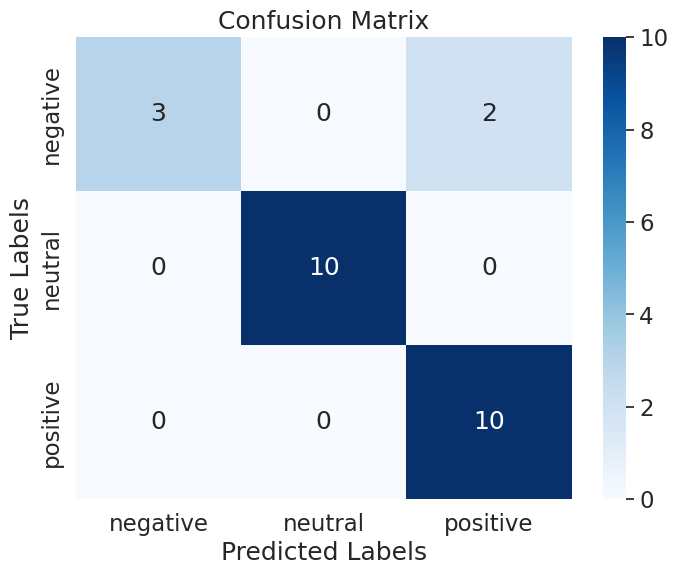

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.60      0.75         5
     Neutral       1.00      1.00      1.00        10
    Positive       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.94      0.87      0.89        25
weighted avg       0.93      0.92      0.91        25



In [55]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset yang sudah dilabeli manual
df_manual = pd.read_csv("/content/drive/MyDrive/Skripsi/data_uji.csv")

# Hitung confusion matrix
conf_matrix = confusion_matrix(df_manual['labels'], data['labels'])

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan classification report
print("Classification Report:")
print(classification_report(df_manual['labels'], data['labels']))
